# Visualizing Many Flips - Ctd

### Objective

We have already seen coin flips, and how they relate to Pascal's triangle, how they evolve in to binomial distribution earlier in ```Problem Set 2 - Probability``` section. 

In ```19A. Central Limit Theorem``` section, Sebastian ups the game with tossing a die with 3 outcomes (1,2,3). While we could follow pattern to calculate results, visualizing how that outcomes would be could be helpful to strengthen our insights.  So I have created another set of functions that could help us do that. 

**Note**: This section focuses only on programming part that helps us visualize the outputs when number of outcomes vary. I will have another section dedicated to ```19A. Central Limit Theorem``` where I pull up these functions and illustrate the examples provided by Sebastian. 

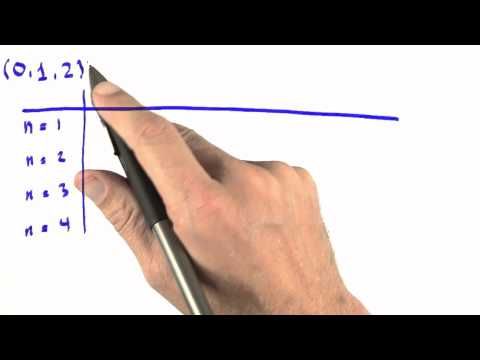

In [1]:
# just a helper function for easier youtube call
def strip_url(url):
    return url.replace('https://youtu.be/','')

from IPython.display import YouTubeVideo
url = 'https://youtu.be/jajxhNBnbmI'
YouTubeVideo(strip_url(url))

### Toss Definition

Suppose we have a dice, that produces 3 outcomes 0, 1, 2 when tossed. Suppose we toss it 2 times. The questions at hand are,  

1. What are the possible outcomes/sequences
2. What are the number of occurences of sum of their individual outcomes? 
3. What are their probabilities (assuming equal probability for n outcomes as $\dfrac {1}{n}$)

#### What are the possible outcomes/sequences? 

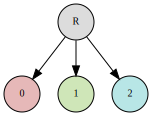

In [2]:
from graphviz import Digraph
import colorsys
import random


def HSVToHex(h, s, v):
    (r, g, b) = colorsys.hsv_to_rgb(h, s, v)
    hexy = "".join("%02X" % round(r*255)) + "".join("%02X" % round(g*255)) + "".join("%02X" % round(b*255))
    return hexy
 
def getDistinctColors(n):
    huePartition = 1.0 / (n + 1)
    saturation = 0.2
    lightness = 0.9
    colors_list = [HSVToHex(huePartition * value, saturation, lightness) for value in range(0, n)]
    return colors_list#, colors_comp_list

def draw_graph(g, n_outcomes = 2, n_flips=2):
    """
    Given no of flips, this function creates a corresponding probability tree
    For now, assuming outcomes are numbered
    """
    #g.attr(rankdir='LR', ranksep='0.5')
    g.attr('node', shape='circle', fontsize='10')
    g.attr('edge', fontsize='10')
    g.node('Root','R',style='filled', fillcolor='#DCDCDC')    # first node
    
    i_kids = 1
    parent_list = []
    
    # colors for each outcome
    colors_list = getDistinctColors(n_outcomes)
    #print(colors_list)
    
    # for each flip
    for each_flip in range(1, n_flips+1):
        per_flip_outcomes = n_outcomes**(each_flip)
        
        # for each node outcome of flip
        temp_list = []
        p_index = 0 # parent index for each node
        for each_outcome in range(0, int(per_flip_outcomes/n_outcomes)):
            
            
            # draw nodes, record parents
            for each_kid in range(0, n_outcomes):                
                
                new_kid_ID = '{}'.format(i_kids) # Id the kid
                new_kid_label = str(each_kid)
                g.node(new_kid_ID, new_kid_label, style='filled', fillcolor='#{}'.format(colors_list[each_kid]), fontcolor='black')
                               
                parents = parent_list[-1] if len(parent_list) > 0 else []
                parent = parents[p_index] if len(parents) > 0 else None
                
                #debug
                #print('Flip:{} Outcome:{} Kid\'s Label:{} Possible ID:{} Parent:{}'.format(each_flip, each_outcome, each_kid, i_kids, parent))    
                
                i_kids += 1
                
                # draw edges
                if parent is not None:
                    g.edge(parent, new_kid_ID)
                else: 
                    g.edge('Root', new_kid_ID)
                
                # for next set of kids                    
                temp_list.append(new_kid_ID)
                
            p_index += 1

        parent_list.append(temp_list)
        print()
                
    return g


g = Digraph(strict=True)
g = draw_graph(g, n_outcomes = 3, n_flips=1)
g

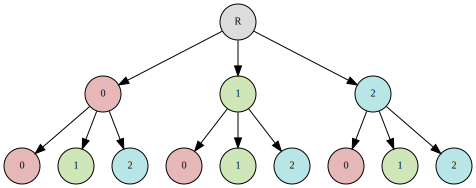

In [3]:
g = Digraph(strict=True)
g = draw_graph(g, n_outcomes = 3, n_flips=2)
g

#### Tabular View

Let X denote the total sum of any sequence after each toss/flip.  

In [4]:
import pandas as pd 

def sum_digits(n):
    n = int(n)
    s = 0
    while n:
        s += n % 10
        n //= 10
    return s

def get_combinations(n_outcomes = 2, n_flips=2):
    """
    Given the no of flips, this function will provide the final sequence combinations as a panda dataframe
    """
    # setup data frame with necessary cols
    columns = ['sequence', 'x']
    df = pd.DataFrame(columns=columns)
    
    # generate the individual outcomes
    outcomes = list(range(0,n_outcomes))  # so if 3, its 0,1,2
    outcomes = [str(i) for i in outcomes]  # convert all to string
    
    # get the combinations
    from itertools import product
    for i in product(outcomes, repeat=n_flips):  
        combi = ''.join(i)
        summy = sum([int(x) for x in i])
        #print(i,combi, summy)
        df = df.append({'sequence': combi, 'x': summy }, ignore_index=True)
        
    # get no of heads in the combinations
    #print('Given no of flips:', n_flips)
    #print('\nx = no of heads in respective sequence')
        
    return df

get_combinations(n_outcomes = 3, n_flips=2)

,sequence,x
0,00,0
1,01,1
2,02,2
3,10,1
4,11,2
5,12,3
6,20,2
7,21,3
8,22,4


#### What are the number of occurences of sum of their individual outcomes? And their probabilities? 

Now let us take the number of occurances for different values of X. For eg, n(X=2) implies, the number of sequences having sum of individual outcomes being 2

In [5]:
def get_combinations_consolidated(n_outcomes = 2, n_flips=2):
    """
    Given the raw dataframe of combinations, this will provide n(x) and p(x)
    """
    # setup data frame with necessary cols
    columns = ['x', 'n(x)', 'p(x)']
    df = pd.DataFrame(columns=columns)
    
    # get raw data
    combi_df = get_combinations(n_outcomes=n_outcomes, n_flips=n_flips)
    x_list = combi_df['x'].tolist()
    
    # extract frequency
    #ref: https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list/2162045
    x_list.sort()
    from itertools import groupby 
    freq_tuple = [ (key, len(list(group))) for key, group in groupby(x_list)]
    #print(freq_tuple)
    
    for each_freq_tuple in freq_tuple:
        x = each_freq_tuple[0]
        n_x = each_freq_tuple[1]
        p_x = n_x/(n_outcomes**n_flips)  # its a conditional probability, thats y divided by total outcomes
        df = df.append({'x': x, 'n(x)': n_x, 'p(x)': p_x }, ignore_index=True)
        
    # convert cols to integer (except p(x))
    df[['x','n(x)']] = df[['x','n(x)']].astype(int) #ref: https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas/21291622

    #print('n(x) = total no of possible x type sequences')
    #print('for eg, if x = 2, n(x) = 3, then there are 3 possible sequence types, in each of which, no of heads is 2')    
    
    #print('\np(x) = conditional probability that n(x) could occur out of all outcomes')
    
    return df

final_df = get_combinations_consolidated(n_outcomes = 3, n_flips=2)
final_df

,x,n(x),p(x)
0,0,1,0.111111
1,1,2,0.222222
2,2,3,0.333333
3,3,2,0.222222
4,4,1,0.111111


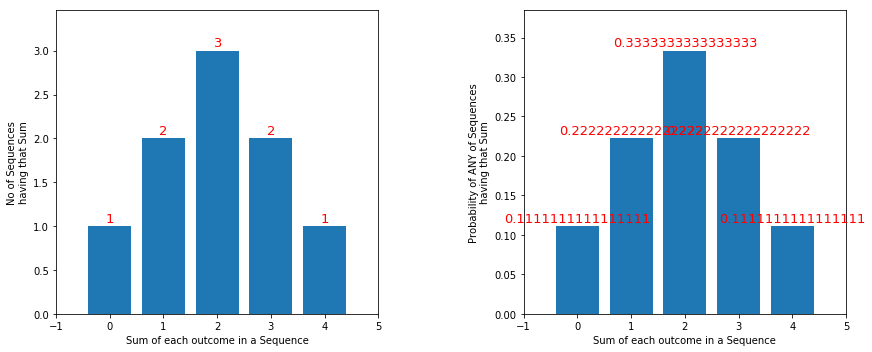

In [7]:
import matplotlib.pyplot as plt

def autoformat(ax, xlabel, ylabel, fontsize):
    """
    Few tweaks for better graph
    """
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(fontsize) # Size here overrides font_prop
        
    ymin = ax.get_ylim()[0]
    ymax = ax.get_ylim()[1]*1.1  # increase space to insert bar value
    ax.set_ylim([ymin,ymax])    

    # x values should be integers as its no of heads
    xmin = -1
    xmax = ax.get_xlim()[1]
    from math import ceil
    xmaxint = ceil(xmax)+1
    xint = range(xmin, xmaxint)
    ax.set_xticks(xint)


def autolabel(ax, rects, fontsize):
    """
    Attach a text label above each bar displaying its height
    ref: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html
    """    
    for rect in rects:
        height = rect.get_height()
        #text = '%.4f' % height
        text = '{0: <{width}}'.format(height, width=1) 
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,text, ha='center', va='bottom', fontsize=fontsize+3, color='red')

def plot_combinations_consolidated(df, fontsize=10):
    """
    Given the dataframe with x, n(x), p(x) this provides two plots:
    x vs n(x)
    x vs p(x)
    """
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    
    X = df['x'].tolist()
    N = df['n(x)'].tolist()
    P = df['p(x)'].tolist()
    
    rects = ax1.bar(X, N)
    autolabel(ax1, rects, fontsize)
    
    xlabel = 'Sum of each outcome in a Sequence'
    ylabel = 'No of Sequences\nhaving that Sum'   
    autoformat(ax1, xlabel, ylabel, fontsize)
    

    rects = ax2.bar(X, P)
    autolabel(ax2, rects, fontsize)
    
    ylabel = 'Probability of ANY of Sequences\nhaving that Sum'   
    autoformat(ax2, xlabel, ylabel, fontsize)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.45)    
    plt.show()
    
plot_combinations_consolidated(final_df)

### Tests.. 

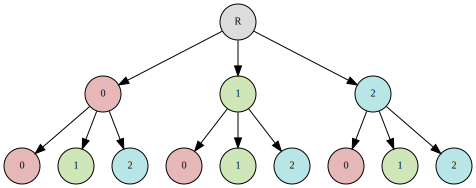

In [12]:
g = Digraph(strict=True)
n_outcomes = 3
n_flips = 2
g = draw_graph(g, n_outcomes = n_outcomes, n_flips=n_flips)
g

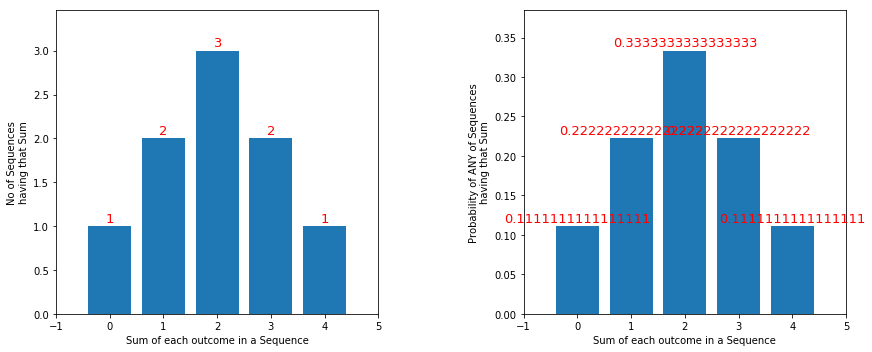

In [13]:
final_df = get_combinations_consolidated(n_outcomes = n_outcomes, n_flips=n_flips)
plot_combinations_consolidated(final_df)